In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

fdir=os.getcwd()
data=pd.read_csv(fdir+os.sep+'data_cohv.csv', sep=',', header=0, encoding = "ISO-8859-1",parse_dates=['SampleDate'])
data = data.dropna()
data = data.reset_index(drop = True)
#data.loc[[45]]
data

,WellName,SampleDate,Variable,Result
0,P1,2012-01-11,Chlorure de vinyle,"<0,1"
1,P1,2012-01-11,"1,1-dichloroéthylène","<0,1"
2,P1,2012-01-11,Dichlorométhane,"<0,5"
3,P1,2012-01-11,"Cis-1,2 Dichloroéthylène*","<0,1"
4,P1,2012-01-11,Chloroforme,"<0,1"
...,...,...,...,...
1884,P36,2005-01-07,"1,1,1, Trichloroéthane","< 0,5"
1885,P36,2005-01-07,Tétrachlorure de carbone,"< 0,5"
1886,P36,2005-01-07,Trichloroéthylène (TCE),43
1887,P36,2005-01-07,Tétrachloroéthylène (PCE),"< 0,5"


In [2]:
data['Variable']=data['Variable'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
data['Variable']=data['Variable'].str.replace('\*','')
data['Result']=data['Result'].str.replace('\*','')
data['Result']=data['Result'].str.replace('\-','')
data['Result']=data['Result'].str.replace('\<','')
data['Result']=data['Result'].str.replace('\,','.')
data['Result']=data['Result'].apply(pd.to_numeric, errors='coerce')
data = data.dropna()
data = data.reset_index(drop = True)

In [3]:
#data.loc[[45]]
#data.head(20)
data = data[data["WellName"] =='P16']
data

,WellName,SampleDate,Variable,Result
932,P16,2012-01-11,Chlorure de vinyle,4.0
933,P16,2012-01-11,"1,1-dichloroethylene",4.0
934,P16,2012-01-11,Dichloromethane,20.0
935,P16,2012-01-11,"Cis-1,2 Dichloroethylene",1600.0
936,P16,2012-01-11,Chloroforme,4.0
...,...,...,...,...
1157,P16,2004-01-12,"1,1,1, Trichloroethane",160.0
1158,P16,2004-01-12,Tetrachlorure de carbone,1.3
1159,P16,2004-01-12,Trichloroethylene (TCE),10000.0
1160,P16,2004-01-12,Tetrachloroethylene (PCE),14.0


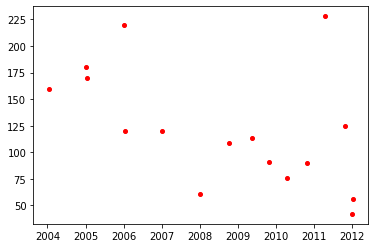

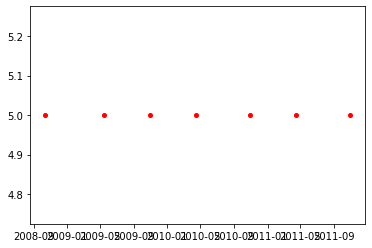

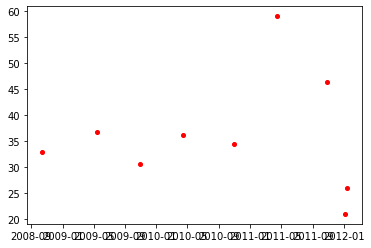

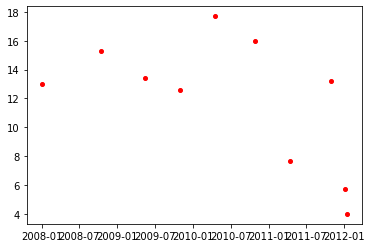

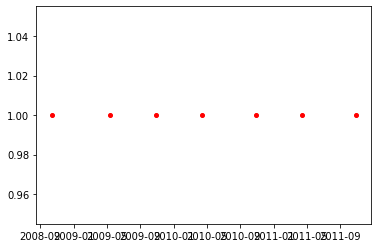

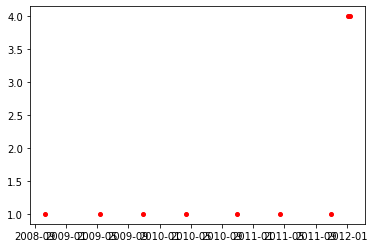

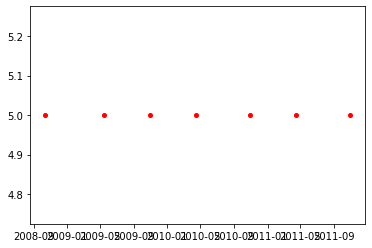

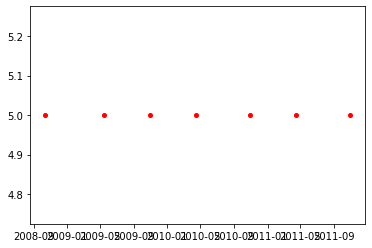

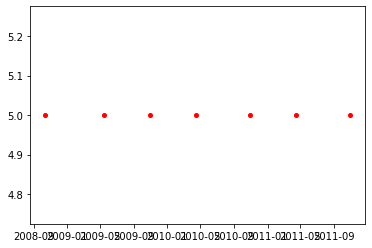

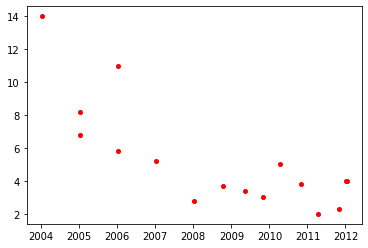

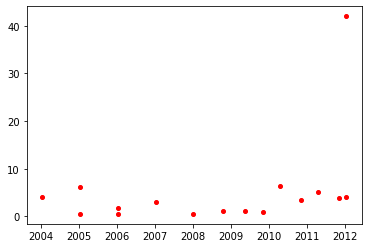

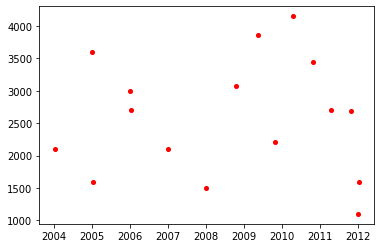

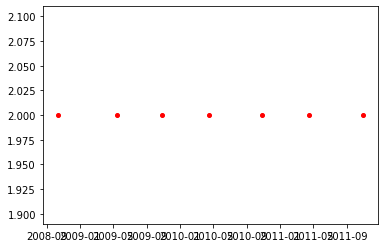

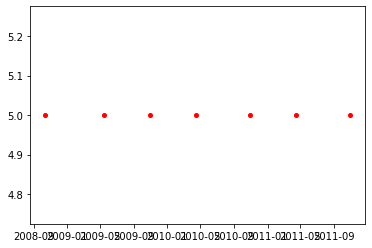

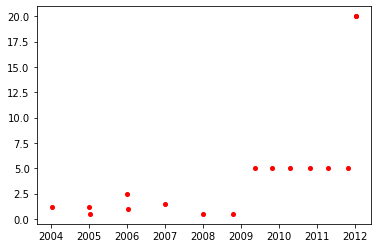

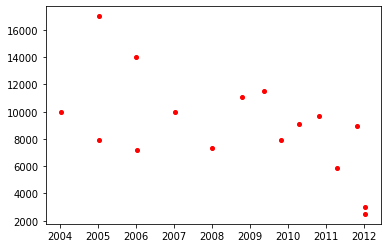

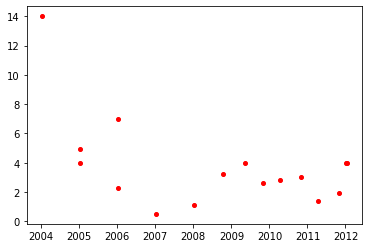

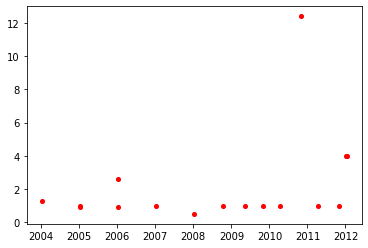

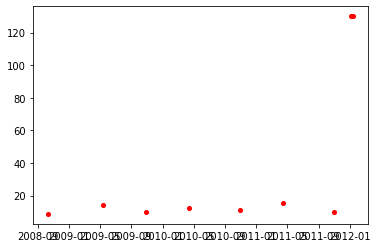

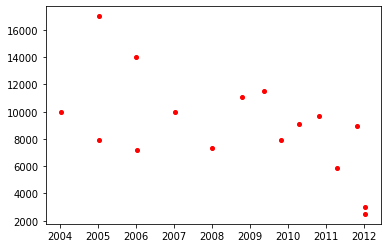

In [4]:
for i in np.unique(data["Variable"]):
    #print(i)
    # On génère un jeu de données par espèce
    date_arr = data["Variable"]==i
    val_arr = data["Variable"]==i

    date = data[date_arr]
    val = data[val_arr]
    plt.plot(date["SampleDate"],val["Result"],'ro',markersize=4)

    plt.show()

In [5]:
#data.to_csv(fdir+os.sep+'data_cohv2.csv', index = False)